In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- <b>Pregnancies:</b> Number of times pregnant<br />
- <b>Glucose:</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br />
- <b>BloodPressure:</b> Diastolic blood pressure (mm Hg)<br />
- <b>SkinThickness:</b> Triceps skin fold thickness (mm)<br />
- <b>Insulin:</b> 2-Hour serum insulin (mu U/ml)<br />
- <b>BMI:</b> Body mass index (weight in kg/(height in m)^2)<br />
- <b>DiabetesPedigreeFunction:</b> Diabetes pedigree function<br />
- <b>Age:</b> Age (years)<br />
- <b>Outcome:</b> Class variable (0 or 1)<br />
</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


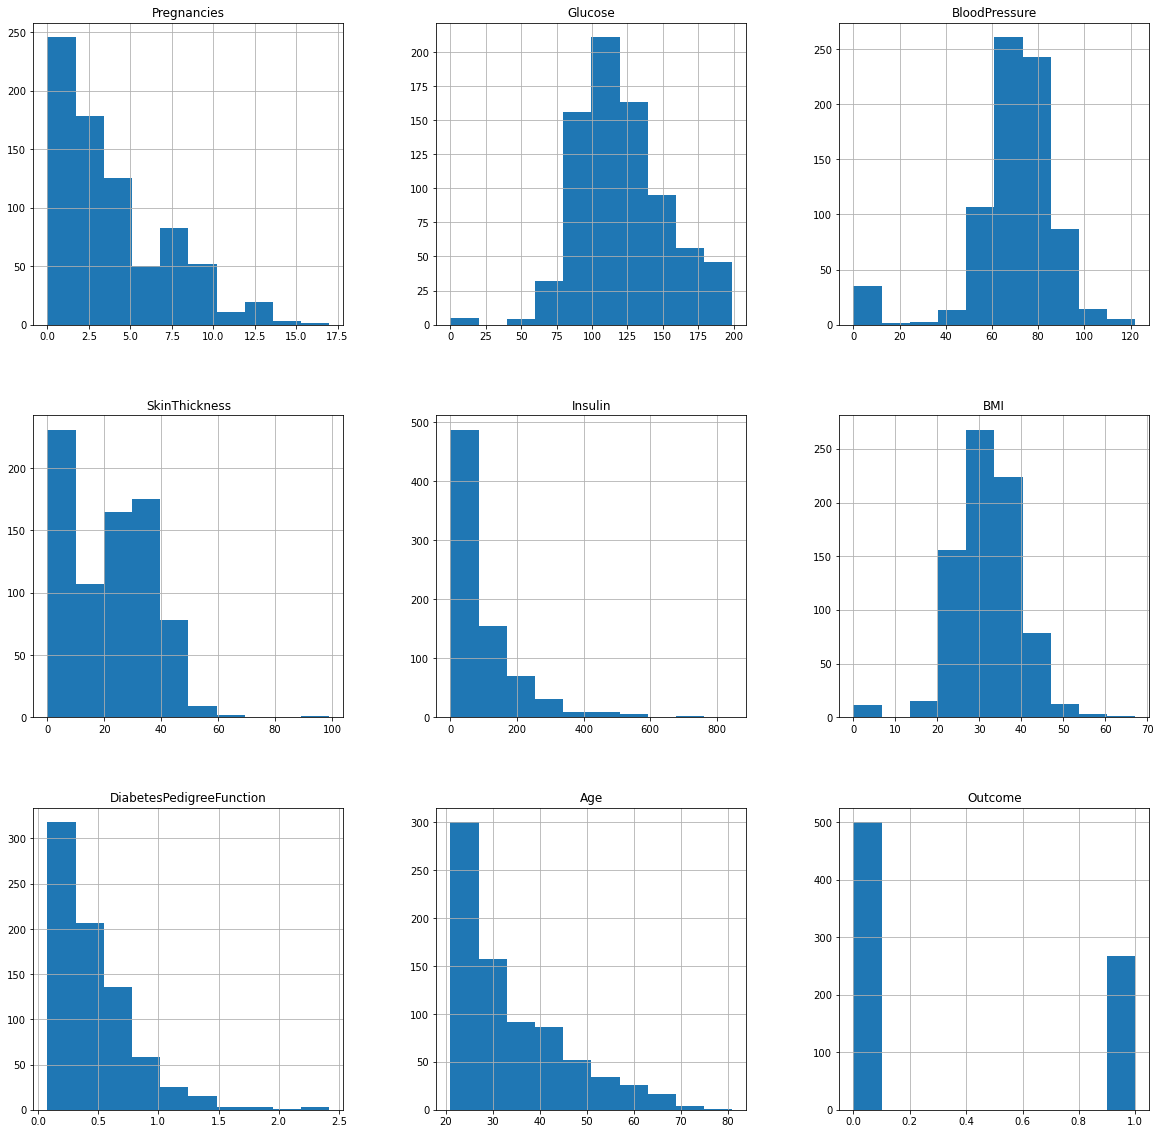

In [6]:
df.hist(figsize = (20,20))
plt.show()

<h3> Converting 0 values in 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', to NAN for easy counting and these NAN values needs to assigned suitable values.</h3>

In [7]:
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## Counting Null values
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<h3> Imputing missing values by mean value </h3>

In [8]:
# Imputing Missing Values by mean value
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].mean(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)

In [9]:
diabetes_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3> Distribution Plot for all Numerical Featrues after Imputing Null Values </h3>

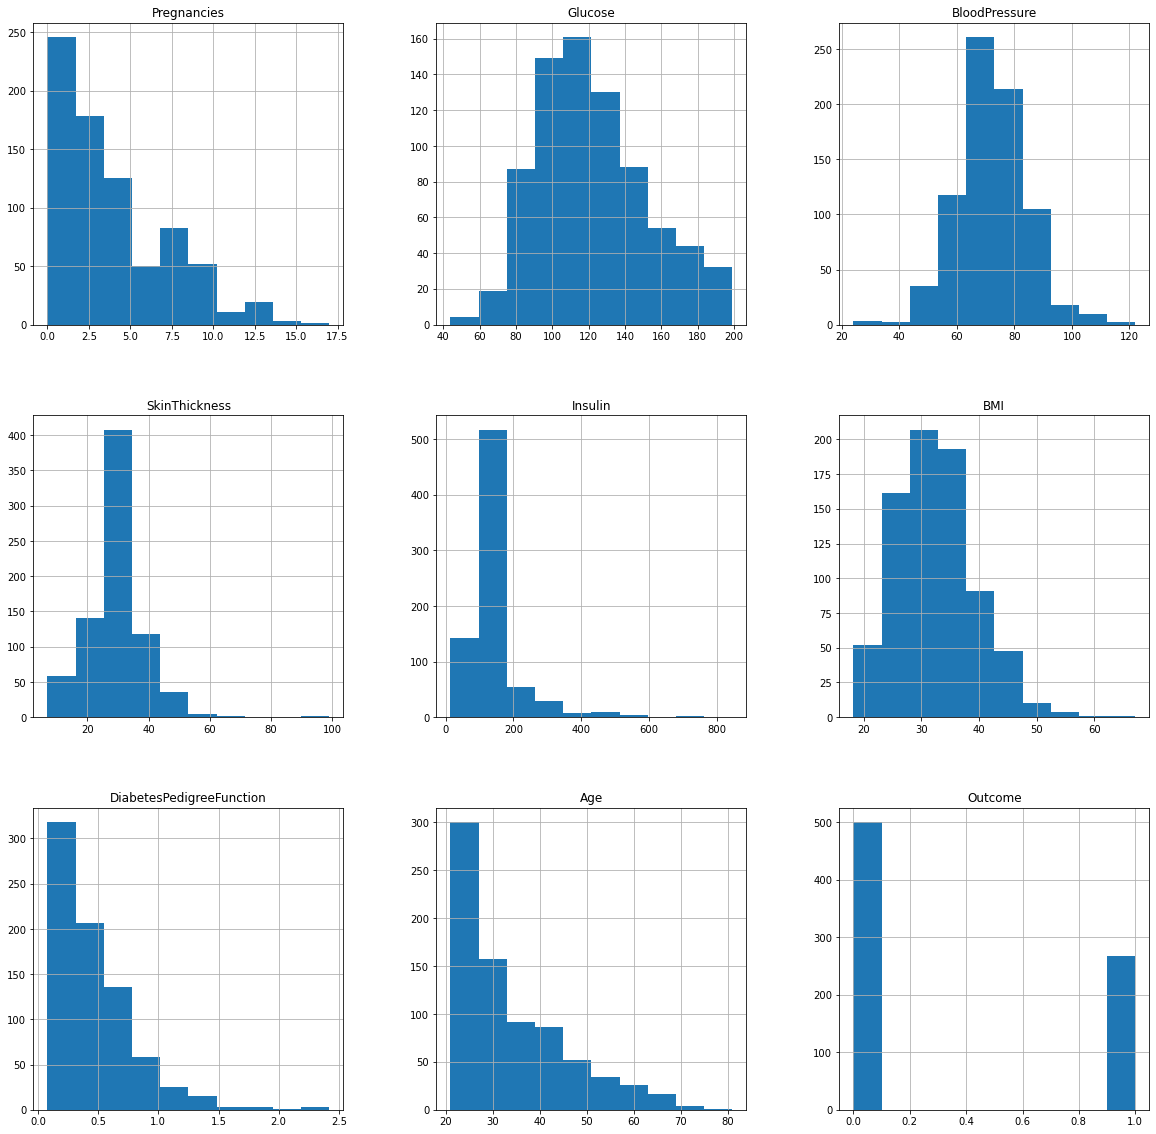

In [10]:
diabetes_data_copy.hist(figsize = (20,20))
plt.show()

In [11]:
# Shape of Data
diabetes_data_copy.shape

(768, 9)

<h2> Checking for outcome values difference</h2>
<body> We can see that Persons who doesn't have diabetes are almost double than the persons who has diabetes. </body>

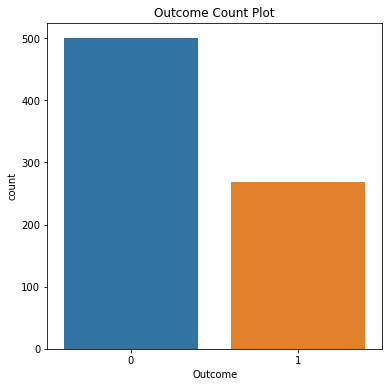

In [12]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.countplot(x='Outcome', data=diabetes_data_copy)
plt.title("Outcome Count Plot")
plt.show()

<h2> Checking for the pregnancies count </h2>

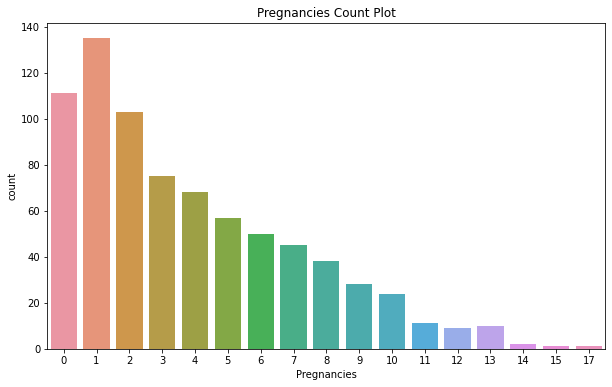

In [13]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.countplot(x='Pregnancies', data=diabetes_data_copy)
plt.title("Pregnancies Count Plot")
plt.show()

<h2> Checking for correlation between features and outcome</h2>

<AxesSubplot:>

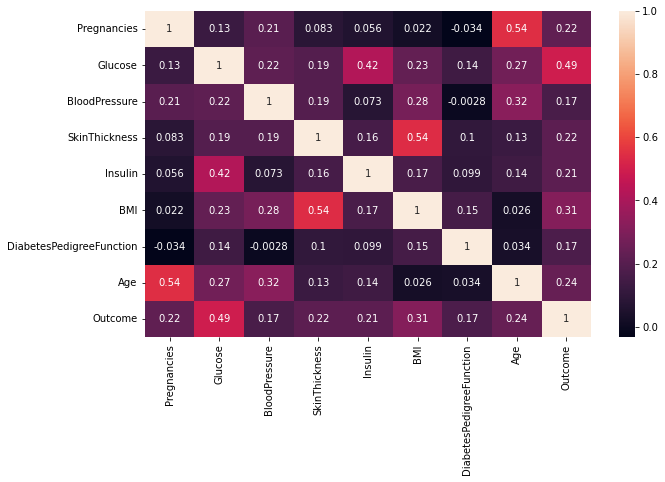

In [14]:
sns.heatmap(diabetes_data_copy.corr(),annot=True)

<body> We can see some positive correlation between features and outcome from the above heatmap. <br>
   1) Glucose & Insulin <br>
   2) BMI & Skin Thickness <br>
   3) Age & Pregnancies <br>
   4) Glucose & Outcome <br>
</body>

<body> Below graph represents the relationship between Glucose & Insulin, we can see that as the person has more glucose in his body, he'll also need more insulin to absorb that glucose. </body>

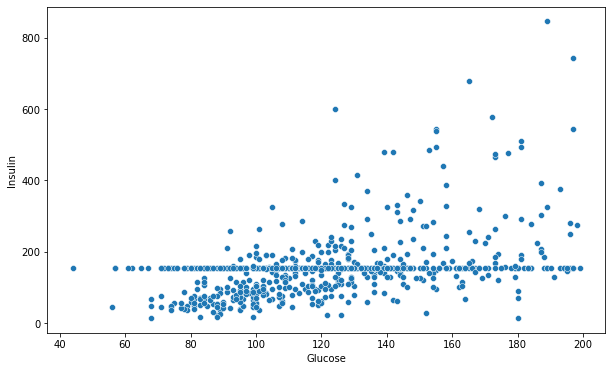

In [15]:
fig = sns.scatterplot(x='Glucose',y='Insulin',data=diabetes_data_copy)

<body> We can see in the below graph the relationship between Age and pregnancies.

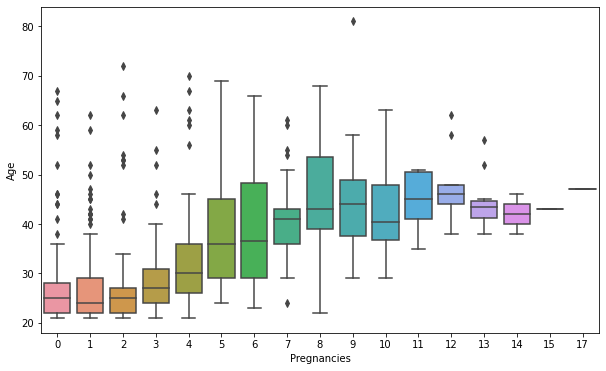

In [16]:
fig = sns.boxplot(x='Pregnancies',y='Age',data=diabetes_data_copy)

<body> Below graph represents the relationship between BMI & SkinThickness, we can see that as the person's BMI increases, his skin thickness also increases. </body>

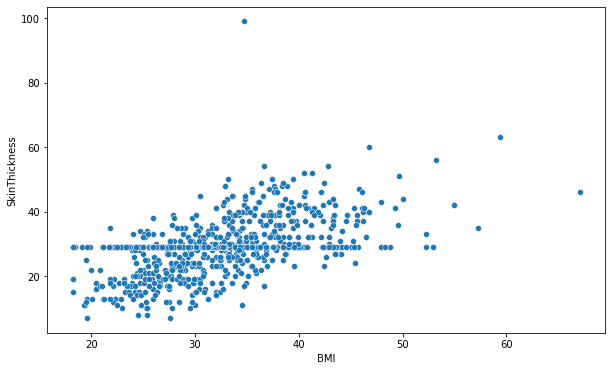

In [17]:
fig = sns.scatterplot(x='BMI',y='SkinThickness',data=diabetes_data_copy)

<body> Below graph represents the relationship between Age & whether a person has diabetes or not, we can see that an old person has a higher chance of diabetes than a younger person, there are some outliers but they are expected.</body>

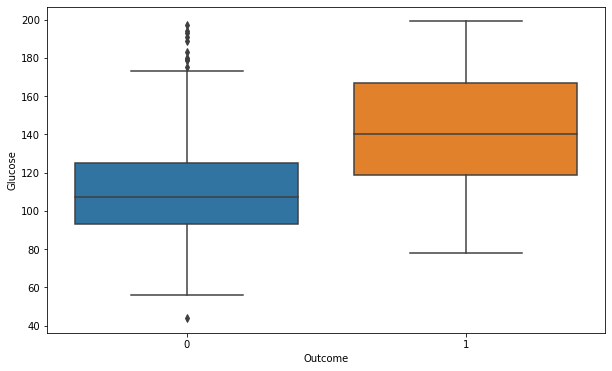

In [18]:
fig = sns.boxplot(data=diabetes_data_copy, x='Outcome', y='Glucose')

<h2> Summary of Data Analysis </h2>
<body> People with diabetes are highly likely to be older than people who don’t. They are also more likely to have higher BMI’s, or suffer from obesity. They are also more likely to have higher glucose levels in their blood. People with higher glucose levels also tend to take more insulin, and this positive correlation indicates that patients with diabetes could also have higher insulin levels. <body>

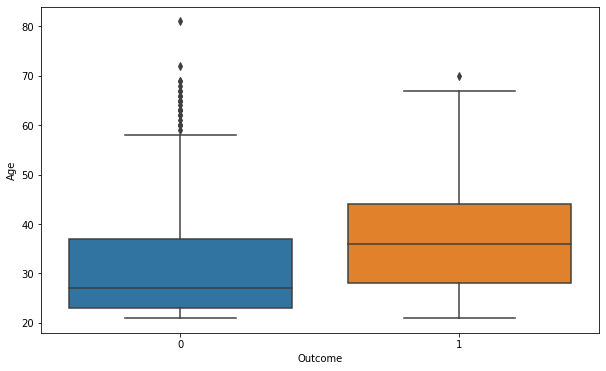

In [19]:
fig = sns.boxplot(data=diabetes_data_copy, x='Outcome', y='Age')

<h2> Separating inputs & outputs

In [20]:
X = diabetes_data_copy.drop("Outcome", axis=1).values
y = diabetes_data_copy.Outcome.values

<h2> Splitting the data between train & test </h2>

In [21]:
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

<h2> Using LogisticClassifier </h2>

In [22]:
logistic = sklearn.linear_model.LogisticRegression
classifier = logistic(max_iter=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
classifier.coef_

array([[ 0.09708877,  0.03732843, -0.01423187, -0.00446885, -0.00125306,
         0.09732391,  0.72447431,  0.01833283]])

In [24]:
classifier.intercept_

array([-8.47130643])

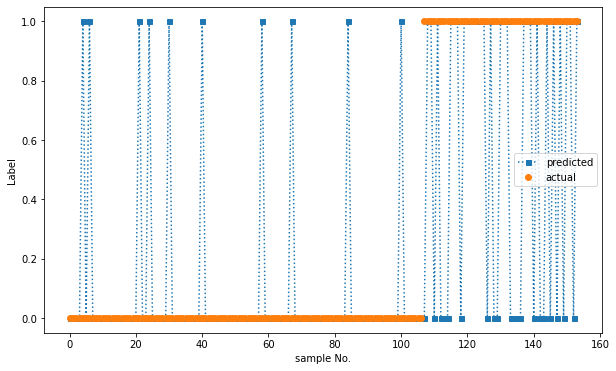

In [25]:
test_temp=np.argsort(y_test)
plt.plot(np.arange(len(y_pred)),y_pred[test_temp],':s', markersize=5,label='predicted')
plt.plot(np.arange(len(y_pred)),y_test[test_temp],'o',label='actual')
plt.xlabel('sample No.')
plt.ylabel('Label')
plt.legend()
plt.show()

In [26]:
report=sklearn.metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



Confusion Matrix 
 [[97 10]
 [20 27]]


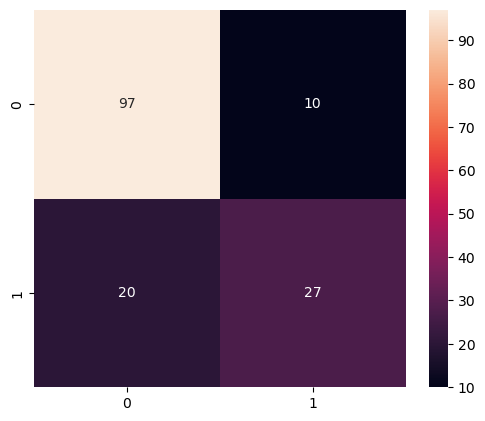

In [27]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", cm)

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["figure.dpi"] = (100)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f')
plt.show()

<h2> Using GradientBoostingClassifier </h2>

In [28]:
GBC = sklearn.ensemble.GradientBoostingClassifier
model = GBC()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred = model.predict(X_test)

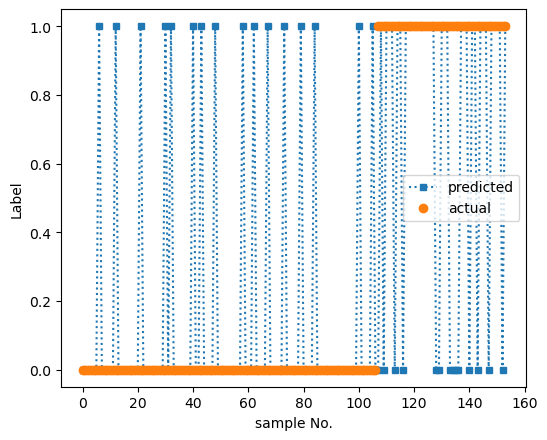

In [30]:
test_temp=np.argsort(y_test)
plt.plot(np.arange(len(y_pred)),y_pred[test_temp],':s', markersize=5,label='predicted')
plt.plot(np.arange(len(y_pred)),y_test[test_temp],'o',label='actual')
plt.xlabel('sample No.')
plt.ylabel('Label')
plt.legend()
plt.show()

Confusion Matrix 
 [[91 16]
 [14 33]]


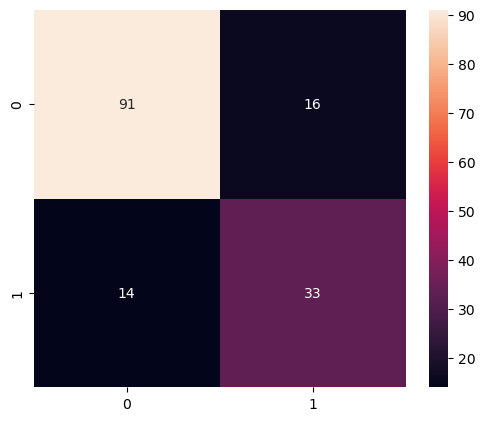

In [31]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", cm)

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["figure.dpi"] = (100)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f')
plt.show()

In [32]:
report=sklearn.metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       107
           1       0.67      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.81      0.81      0.81       154

